#### Exercici 1. Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu. També adjunt trobaràs una descripció de les diferents variables del dataset.

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing = pd.read_csv('/Users/juliacorominasfont/Desktop/DATA ANALYST/Bootcamp IT Academy/Tasques Sprints/Sprint_5_SkLearn_Train_Test /housing data.csv', names= cols)
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [126]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [127]:
housing.shape

(506, 14)

El dataset té 506 registres i 14 columnes. Dels 14 atributs, tretze contenen una variable continua i el restant una variable binària. 

- CRIM: Índex de criminalitat per càpita CRIM per ciutat
- ZN: proporció de sòl residencial zonificat per a lots de més de 25.000 peus quadrats
- INDUS: proporció d'acres comercials no minoristes per ciutat
- CHAS: Variable binària fictícia de Charles River (= 1 si la zona està al costat del riu; 0 en cas contrari)
- NOX: concentració d'òxids nítrics (parts per 10 milions)
- RM: nombre mitjà d'habitacions per habitatge
- AGE: proporció d'unitats ocupades pels seus propietaris construïdes abans de 1940
- DIS: distàncies ponderades a cinc centres d'ocupació de Boston
- RAD: índex d'accessibilitat a autopistes radials
- TAX: taxa de l'impost sobre béns immobles de valor íntegre per 10.000 dòlars
- PTRATIO: ràtio alumne-professor per ciutat
- B: 1000(Bk - 0,63)^2 on Bk és la proporció de negres per ciutat
- LSTAT: % estatus inferior de la població
- MEDV: Valor mitjà dels habitatges ocupats pels seus propietaris en 1000$.

La variable objectiu (o target) és MEDV, que fa referència al valor dels habitatges en els suburbis de Boston. La resta d'atributs constitueixen el 'feature matrix'. 

In [128]:
#Neteja i exploració del Dataset

#Comprovar si hi ha duplicats
housing.drop_duplicates()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [129]:
#Comprovació dels NaNs 
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No hi ha valors nuls en cap de les variables, pel que no cal atendre aquesta qüestió.

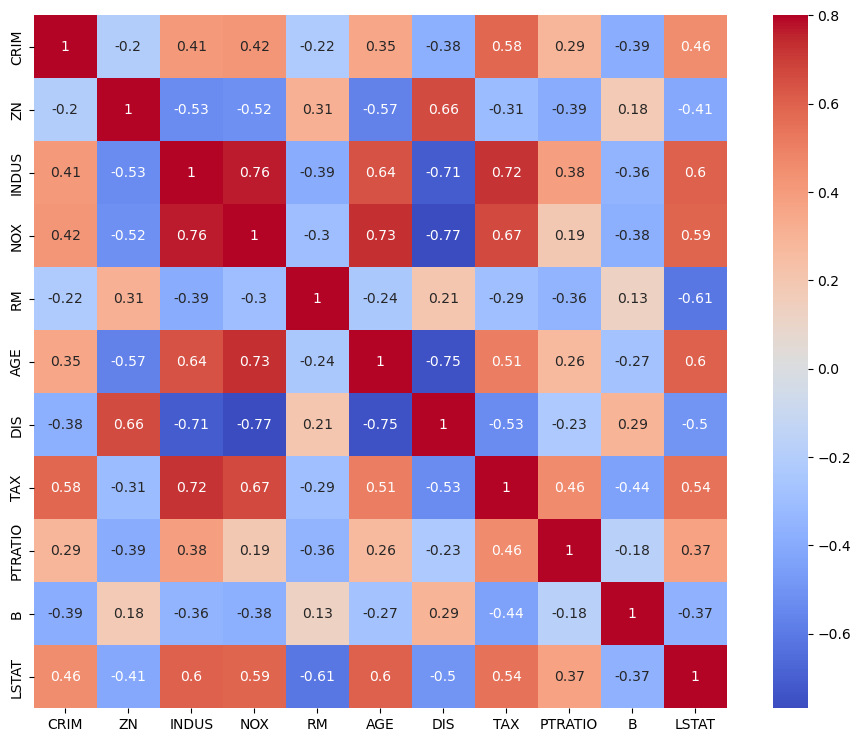

In [130]:
#Relació entre variables numèriques 
variables_numeriques = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'] 

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(housing[variables_numeriques].corr(), vmax=.8, square=True, annot=True, cmap='coolwarm');
plt.show()

Les variables amb una correlació més forta entre sí són INDUS i NOX, de 0.76. La primera fa referència a la proporció d'acres comercials no minoristes per ciutat, mentre que la segona es refereix la concentració d'òxids nítrics. Per tant, un augment proporció d'acres comercials no minoristes també implica un augment de la concentració d'òxids nítrics.

Per contra, veiem que els atributs NOX i DIS són els que tenen una relació negativa més forta (-0,77). El primer fa referència a la concentració d'òxids nítrics, mentre que el segon es refereix a les distàncies ponderades respecte de cinc centres d'ocupació de Boston. Això ens indica que com més gran sigui la distància i, per tant, com més lluny estiguin els centres d'ocupació, menor serà la concentració d'òxids nítrics.

### Conjunts Train i Test

In [131]:
#Divisió del conjunt en Training i Test Set

from sklearn.model_selection import train_test_split

X = housing.drop('MEDV', axis=1) #característiques(features)
y = housing['MEDV'] #variable target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Forma del Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Forma del Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Forma del Training set: X=(404, 13), y=(404,)
Forma del Test set: X=(102, 13), y=(102,)


In [132]:
# Estudi descriptiu del Train Set 
X_train[variables_numeriques].describe().round(3)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000
mean,3.609,11.569,10.985,0.556,6.316,68.556,3.808,404.032,18.318,356.278,12.457
std,8.875,23.152,6.895,0.118,0.709,27.995,2.131,166.173,2.229,91.567,7.110
min,0.009,0.000,0.740,0.385,3.863,2.900,1.130,187.000,12.600,0.320,1.730
25%,0.081,0.000,5.130,0.452,5.890,45.550,2.088,279.000,16.800,375.472,6.772
50%,0.261,0.000,8.560,0.538,6.210,77.700,3.176,330.000,18.700,391.305,10.925
75%,3.203,20.000,18.100,0.631,6.637,93.650,5.401,666.000,20.200,395.755,16.373
max,88.976,100.000,27.740,0.871,8.780,100.000,12.126,711.000,22.000,396.900,37.970


In [133]:
# Estudi descriptiu del Test Set 
X_test[variables_numeriques].describe().round(3)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000
mean,3.631,10.549,11.738,0.548,6.161,68.648,3.743,424.892,18.999,358.241,13.428
std,7.460,24.083,6.723,0.109,0.664,28.891,2.011,177.462,1.801,90.642,7.245
min,0.006,0.000,0.460,0.392,3.561,6.200,1.169,188.000,13.000,6.680,2.880
25%,0.087,0.000,6.102,0.448,5.870,43.800,2.264,281.750,18.400,375.020,7.688
50%,0.210,0.000,10.590,0.532,6.171,74.700,3.353,345.000,19.200,392.205,12.335
75%,4.522,0.000,18.100,0.621,6.479,95.225,4.765,666.000,20.200,396.900,18.018
max,45.746,95.000,27.740,0.871,8.034,100.000,10.710,711.000,22.000,396.900,36.980


Destaca la diferència entre la mitjana i la mediana de les variables CRIM, ZN i TAX, essent la primera molt superior a la segona. Això ens indica que la distribució està notablement esbiaixada cap a la dreta. El contrari succeix amb les variables AGE i B. Per tant, en aquests casos la distribució està esbiaixada cap a l'esquerre.

Per exemple:

Text(0.5, 1.0, 'Proporció de població negra')

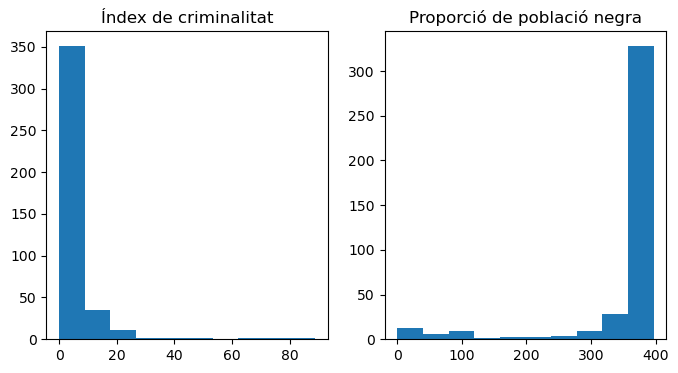

In [134]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(1, 2, 1)

ax1.hist(X_train['CRIM'])
plt.title('Índex de criminalitat')

ax2 = fig.add_subplot(1, 2, 2)

ax2.hist(X_train['B'])
plt.title('Proporció de població negra')

<Axes: >

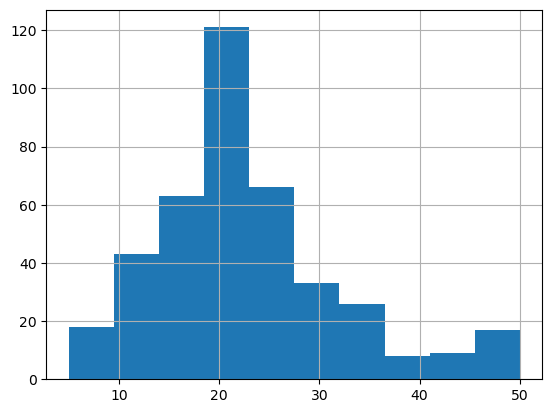

In [135]:
#Distribució de la variable target (train set)
y_train.hist()

<Axes: >

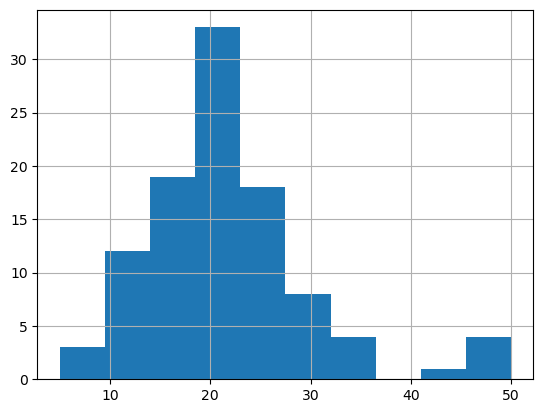

In [136]:
#Distribució de la variable target (test set)
y_test.hist()

Veiem que la distribució no és simètrica, sinó que està una mica esbiaixada cap a la dreta, i que és unimodal.

#### Exercici 2. Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [137]:
#One-hot encoding
housing['RAD'] = housing['RAD'].astype(str)
housing = pd.get_dummies(housing)
housing.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_24,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,...,33.4,0,0,0,1,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,...,36.2,0,0,0,1,0,0,0,0,0


In [138]:
housing['CHAS'] = housing['CHAS'].astype(str)

In [139]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
 13  RAD_1    506 non-null    uint8  
 14  RAD_2    506 non-null    uint8  
 15  RAD_24   506 non-null    uint8  
 16  RAD_3    506 non-null    uint8  
 17  RAD_4    506 non-null    uint8  
 18  RAD_5    506 non-null    uint8  
 19  RAD_6    506 non-null    uint8  
 20  RAD_7    506 non-null    uint8  
 21  RAD_8    506 non

In [140]:
variables_categoriques = housing.select_dtypes(include=['uint8', 'object']).columns

No cal aplicar cap transformació a la variable categòrica CHAS, doncs ja està en valors numèrics.

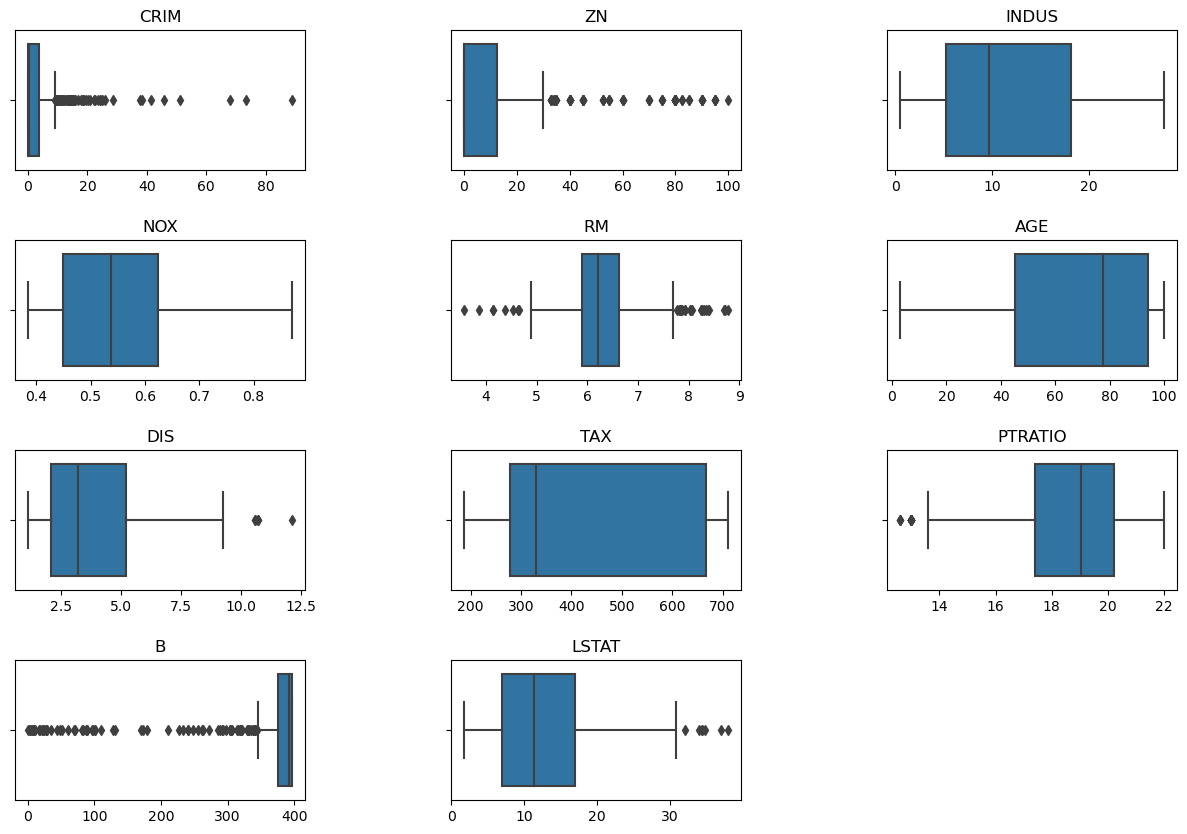

In [141]:
#Estandarització
#Estudi previ de la distribució de les variables per determinar el tipus d'estandarització
fig, axes = plt.subplots(4, 3, figsize=(15, 10))

axes = axes.flatten()

for i, variable in enumerate(variables_numeriques):
    sns.boxplot(x=X[variable], ax=axes[i])
    axes[i].set_title(variable)
    axes[i].set(xlabel='')

for j in range(i+1, 4 * 3): #para eliminar l'últim gràfic
    fig.delaxes(axes[j])

plt.subplots_adjust(wspace=0.5, hspace=0.5)

Tenint en compte que les variables tenen molts outliers, especialment les variables CRIM, ZN, RM i B, és més convenient utilitzar el RobustScaler(). A diferència dels altres estandaritzadors, el RobustScaler() es basa en percentils i, per tant, no està influenciat pels valors atípics.

In [150]:
#Estandarització
transformer = RobustScaler().fit(housing[variables_numeriques])
housing_scaled = pd.DataFrame(transformer.transform(housing[variables_numeriques]), columns=variables_numeriques)

housing_prepared = pd.concat([housing_scaled, housing[variables_categoriques], y], axis=1)
housing_prepared

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,...,RAD_1,RAD_2,RAD_24,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,MEDV
0,-0.069593,1.44,-0.571650,0.000000,0.496612,-0.250765,0.285777,-0.087855,-1.339286,0.261902,...,1,0,0,0,0,0,0,0,0,24.0
1,-0.063755,0.00,-0.202943,-0.394286,0.287940,0.028542,0.569789,-0.227390,-0.446429,0.261902,...,0,1,0,0,0,0,0,0,0,21.6
2,-0.063760,0.00,-0.202943,-0.394286,1.323171,-0.334353,0.569789,-0.227390,-0.446429,0.066675,...,0,1,0,0,0,0,0,0,0,34.7
3,-0.062347,0.00,-0.581720,-0.457143,1.069783,-0.646279,0.924391,-0.279070,-0.125000,0.153016,...,0,0,0,1,0,0,0,0,0,33.4
4,-0.052144,0.00,-0.581720,-0.457143,1.271680,-0.475025,0.924391,-0.279070,-0.125000,0.261902,...,0,0,0,1,0,0,0,0,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.173509,0.200000,0.521003,-0.171254,-0.236007,-0.147287,0.696429,0.026382,...,1,0,0,0,0,0,0,0,0,22.4
502,-0.058759,0.00,0.173509,0.200000,-0.119919,-0.016310,-0.297887,-0.147287,0.696429,0.261902,...,1,0,0,0,0,0,0,0,0,20.6
503,-0.054450,0.00,0.173509,0.200000,1.039973,0.275229,-0.336744,-0.147287,0.696429,0.261902,...,1,0,0,0,0,0,0,0,0,23.9
504,-0.040867,0.00,0.173509,0.200000,0.793360,0.240571,-0.265053,-0.147287,0.696429,0.096414,...,1,0,0,0,0,0,0,0,0,22.0


Aquest és el Dataset resultant després d'aplicar les tècniques de transformació.

#### Exercici 3. Resumeix les noves columnes generades de manera estadística i gràfica

In [151]:
RAD_categories = housing_prepared[['RAD_1', 'RAD_2', 'RAD_3', 'RAD_4', 'RAD_5', 'RAD_6', 'RAD_7', 'RAD_8', 'RAD_24']]
RAD_categories.describe()

,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.039526,0.047431,0.075099,0.217391,0.227273,0.051383,0.033597,0.047431,0.260870
std,0.195035,0.212769,0.263812,0.412879,0.419485,0.220997,0.180367,0.212769,0.439543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
RAD_counts = pd.DataFrame(RAD_categories.sum())
RAD_counts

,0
RAD_1,20
RAD_2,24
RAD_3,38
RAD_4,110
RAD_5,115
RAD_6,26
RAD_7,17
RAD_8,24
RAD_24,132


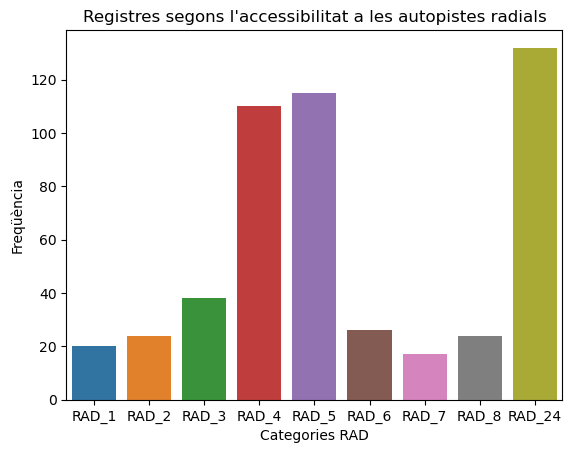

In [153]:
sns.barplot(x=RAD_counts.index, y=RAD_counts[0])

plt.xlabel('Categories RAD')
plt.ylabel("Freqüència")
plt.title("Registres segons l'accessibilitat a les autopistes radials")
plt.show()

Dins de la variable RAD, el valor més freqüent és RAD_24, seguit de RAD_5 i RAD_4. 

In [154]:
CHAS_count = housing_prepared['CHAS'].value_counts()
CHAS_count

0    471
1     35
Name: CHAS, dtype: int64

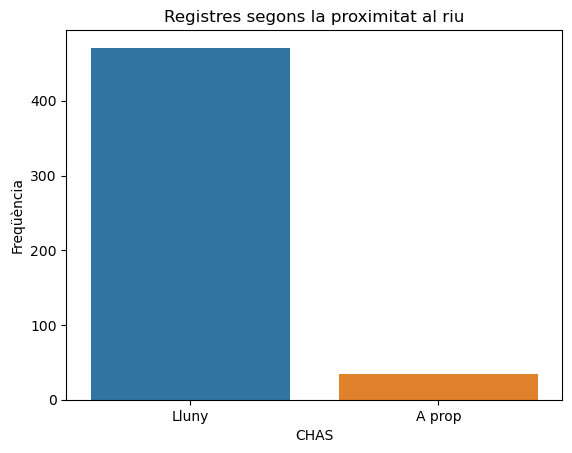

In [155]:
sns.barplot(x=CHAS_count.index, y=CHAS_count.values)

plt.xlabel('CHAS')
plt.ylabel("Freqüència")
plt.title("Registres segons la proximitat al riu")
plt.xticks([0, 1], ['Lluny', 'A prop'])
plt.show()

Dels 506 registres, 471 no estan al costat del riu, mentre que 35 si que ho estan. 